In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SEK-11/dataset_excelR/main/DATA/wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<Axes: >

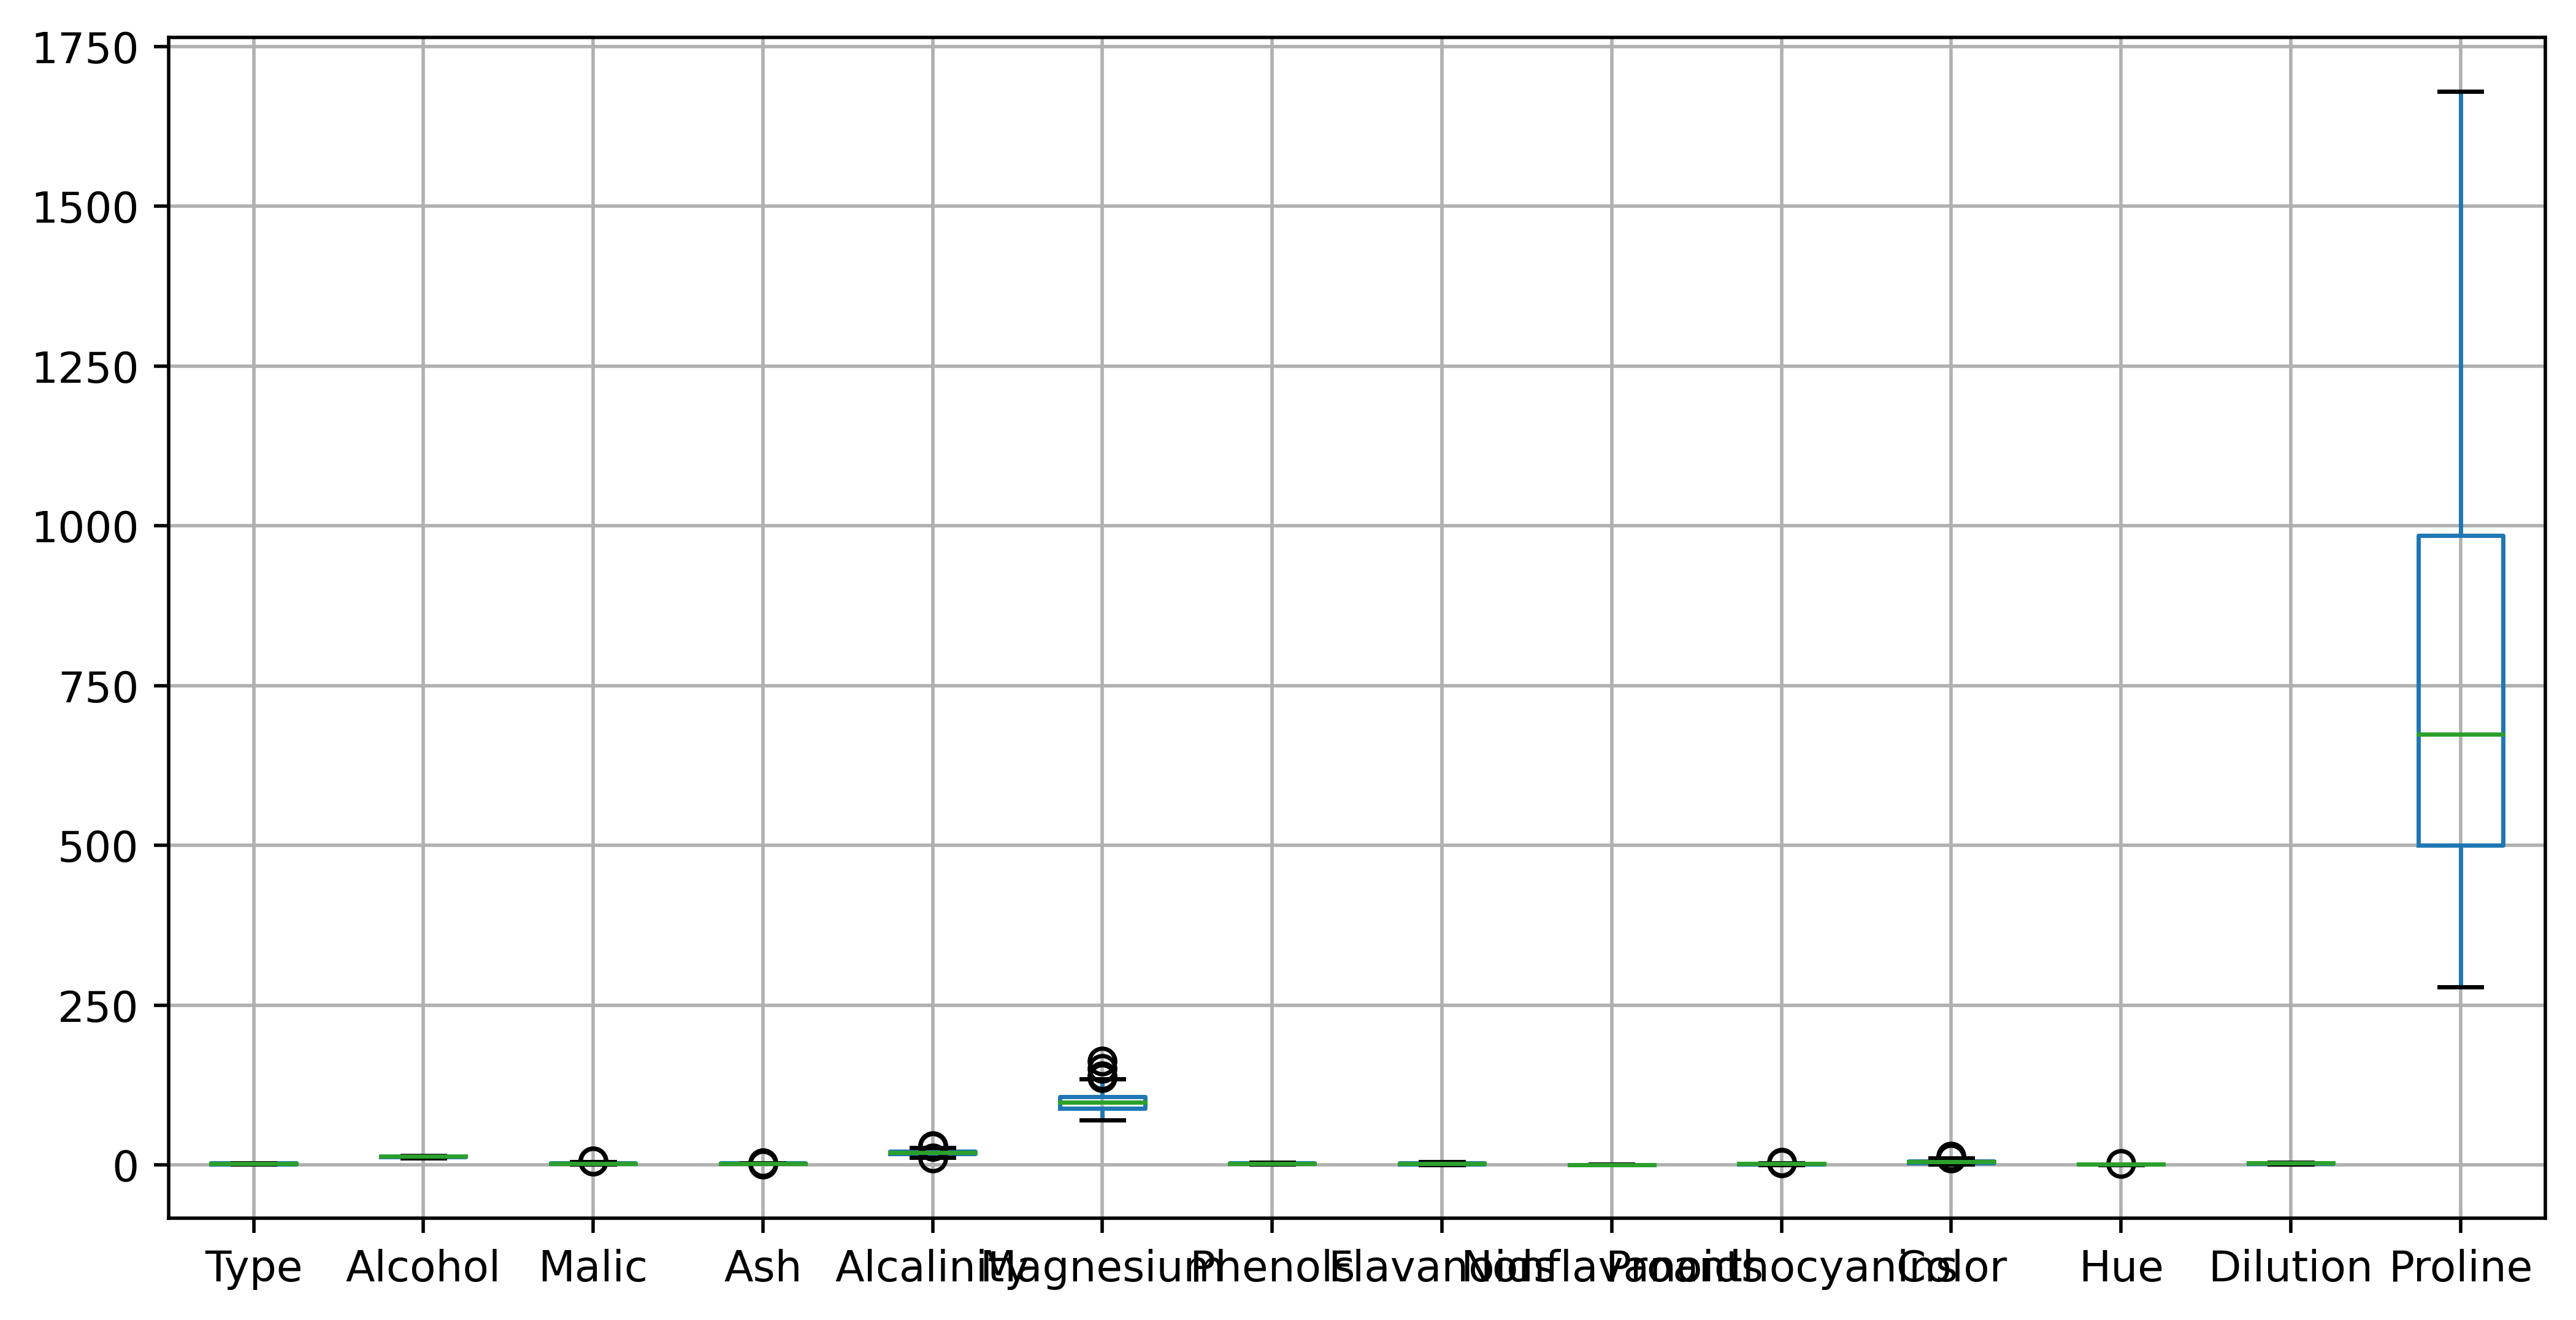

In [5]:
df.boxplot()

In [6]:
def outlier(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)

  iqr = q3 - q1

  upper = q3 + (1.5 * iqr)
  lower = q1 - (1.5 * iqr)

  return lower, upper

In [7]:
outlier(df,"Malic")

(-0.6174999999999997, 5.3025)

In [8]:
df.loc[df["Malic"] > 5.3025 , "Malic"] = 5.3025

In [9]:
outlier(df,"Ash")

(1.6887499999999998, 3.0787500000000003)

In [10]:
df.loc[df["Ash"] > 3.0787500000000003, "Ash"] = 3.0787500000000003

In [11]:
df.loc[df["Ash"] < 1.6887499999999998, "Ash"] = 1.6887499999999998

In [12]:
outlier(df,"Alcalinity")

(10.749999999999998, 27.950000000000003)

In [13]:
df.loc[df["Alcalinity"] > 27.950000000000003, "Alcalinity"] = 27.950000000000003

In [14]:
df.loc[df["Alcalinity"] < 10.749999999999998, "Alcalinity"] = 10.749999999999998

In [15]:
outlier(df,"Magnesium")

(59.5, 135.5)

In [16]:
df.loc[df["Magnesium"] > 135.5, "Magnesium"] = 135.5

In [17]:
outlier(df, "Proanthocyanins")

(0.20000000000000018, 3.0)

In [18]:
df.loc[df["Proanthocyanins"] > 3.0, "Proanthocyanins"] = 3.0

In [19]:
outlier(df,"Color")

(-1.2500000000000009, 10.670000000000002)

In [20]:
df.loc[df["Color"] > 10.670000000000002, "Color"] = 10.670000000000002

In [21]:
outlier(df,"Hue")

(0.2762499999999998, 1.6262500000000002)

In [22]:
df.loc[df["Hue"] > 1.6262500000000002, "Hue"] = 1.6262500000000002

In [23]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()
pcs = pd.DataFrame(pca.fit_transform(x))
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.561968,-1.528967,-0.130558,-0.102725,0.749767,-0.241582,0.687821,0.011639,0.512705,1.068876,-0.371279,0.559975,-0.391569,0.195619
1,-2.544330,0.329993,-2.041603,-0.448040,-0.193861,-0.959958,-0.007630,0.981717,-0.320779,0.020547,-0.125640,0.350435,-0.185027,0.137040
2,-2.806546,-1.042225,1.016791,0.740693,-0.410847,0.481234,0.455990,-0.414297,-1.213945,-0.070917,-0.292712,0.045202,0.047917,-0.056468
3,-3.944287,-2.793264,-0.154956,0.634237,-0.235032,0.266787,-0.403404,0.681048,0.043371,0.118619,0.682974,-0.354389,-0.500658,0.003967
4,-1.415866,-0.953430,2.117093,-0.479292,0.254285,-0.575020,0.492906,0.392037,0.216243,0.128434,-0.573345,-0.134190,0.313438,-0.498089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.575821,-2.165115,-0.378914,0.731787,-0.921869,-1.039551,0.611655,-0.171300,0.100215,-0.329309,0.112341,0.087508,-0.239865,0.096021
174,2.951568,-1.793183,0.210665,0.422008,0.142318,-0.013560,0.131525,-0.575910,-0.012272,-0.246623,0.238265,-0.314203,-0.153762,-0.031829
175,3.019601,-2.860911,-0.975719,0.509405,1.123057,0.094408,0.892320,0.019600,0.036757,-0.199549,0.599992,0.656853,0.030509,-0.057895
176,2.739308,-2.390595,-0.562449,-0.479537,0.878447,1.114849,0.896294,0.379681,-0.034488,0.512213,0.348478,0.329841,-0.192037,0.079584


In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39807866, 0.58017514, 0.68149655, 0.74769068, 0.80752325,
       0.85478642, 0.89232143, 0.9178668 , 0.93895312, 0.95775804,
       0.97405907, 0.98639419, 0.99595177, 1.        ])

In [30]:
pca = PCA(n_components=3)
pcs = pd.DataFrame(pca.fit_transform(x))
pcs

,0,1,2
0,-3.561968,-1.528967,-0.130558
1,-2.544330,0.329993,-2.041603
2,-2.806546,-1.042225,1.016791
3,-3.944287,-2.793264,-0.154956
4,-1.415866,-0.953430,2.117093
...,...,...,...
173,3.575821,-2.165115,-0.378914
174,2.951568,-1.793183,0.210665
175,3.019601,-2.860911,-0.975719
176,2.739308,-2.390595,-0.562449


In [31]:
from scipy.cluster import hierarchy

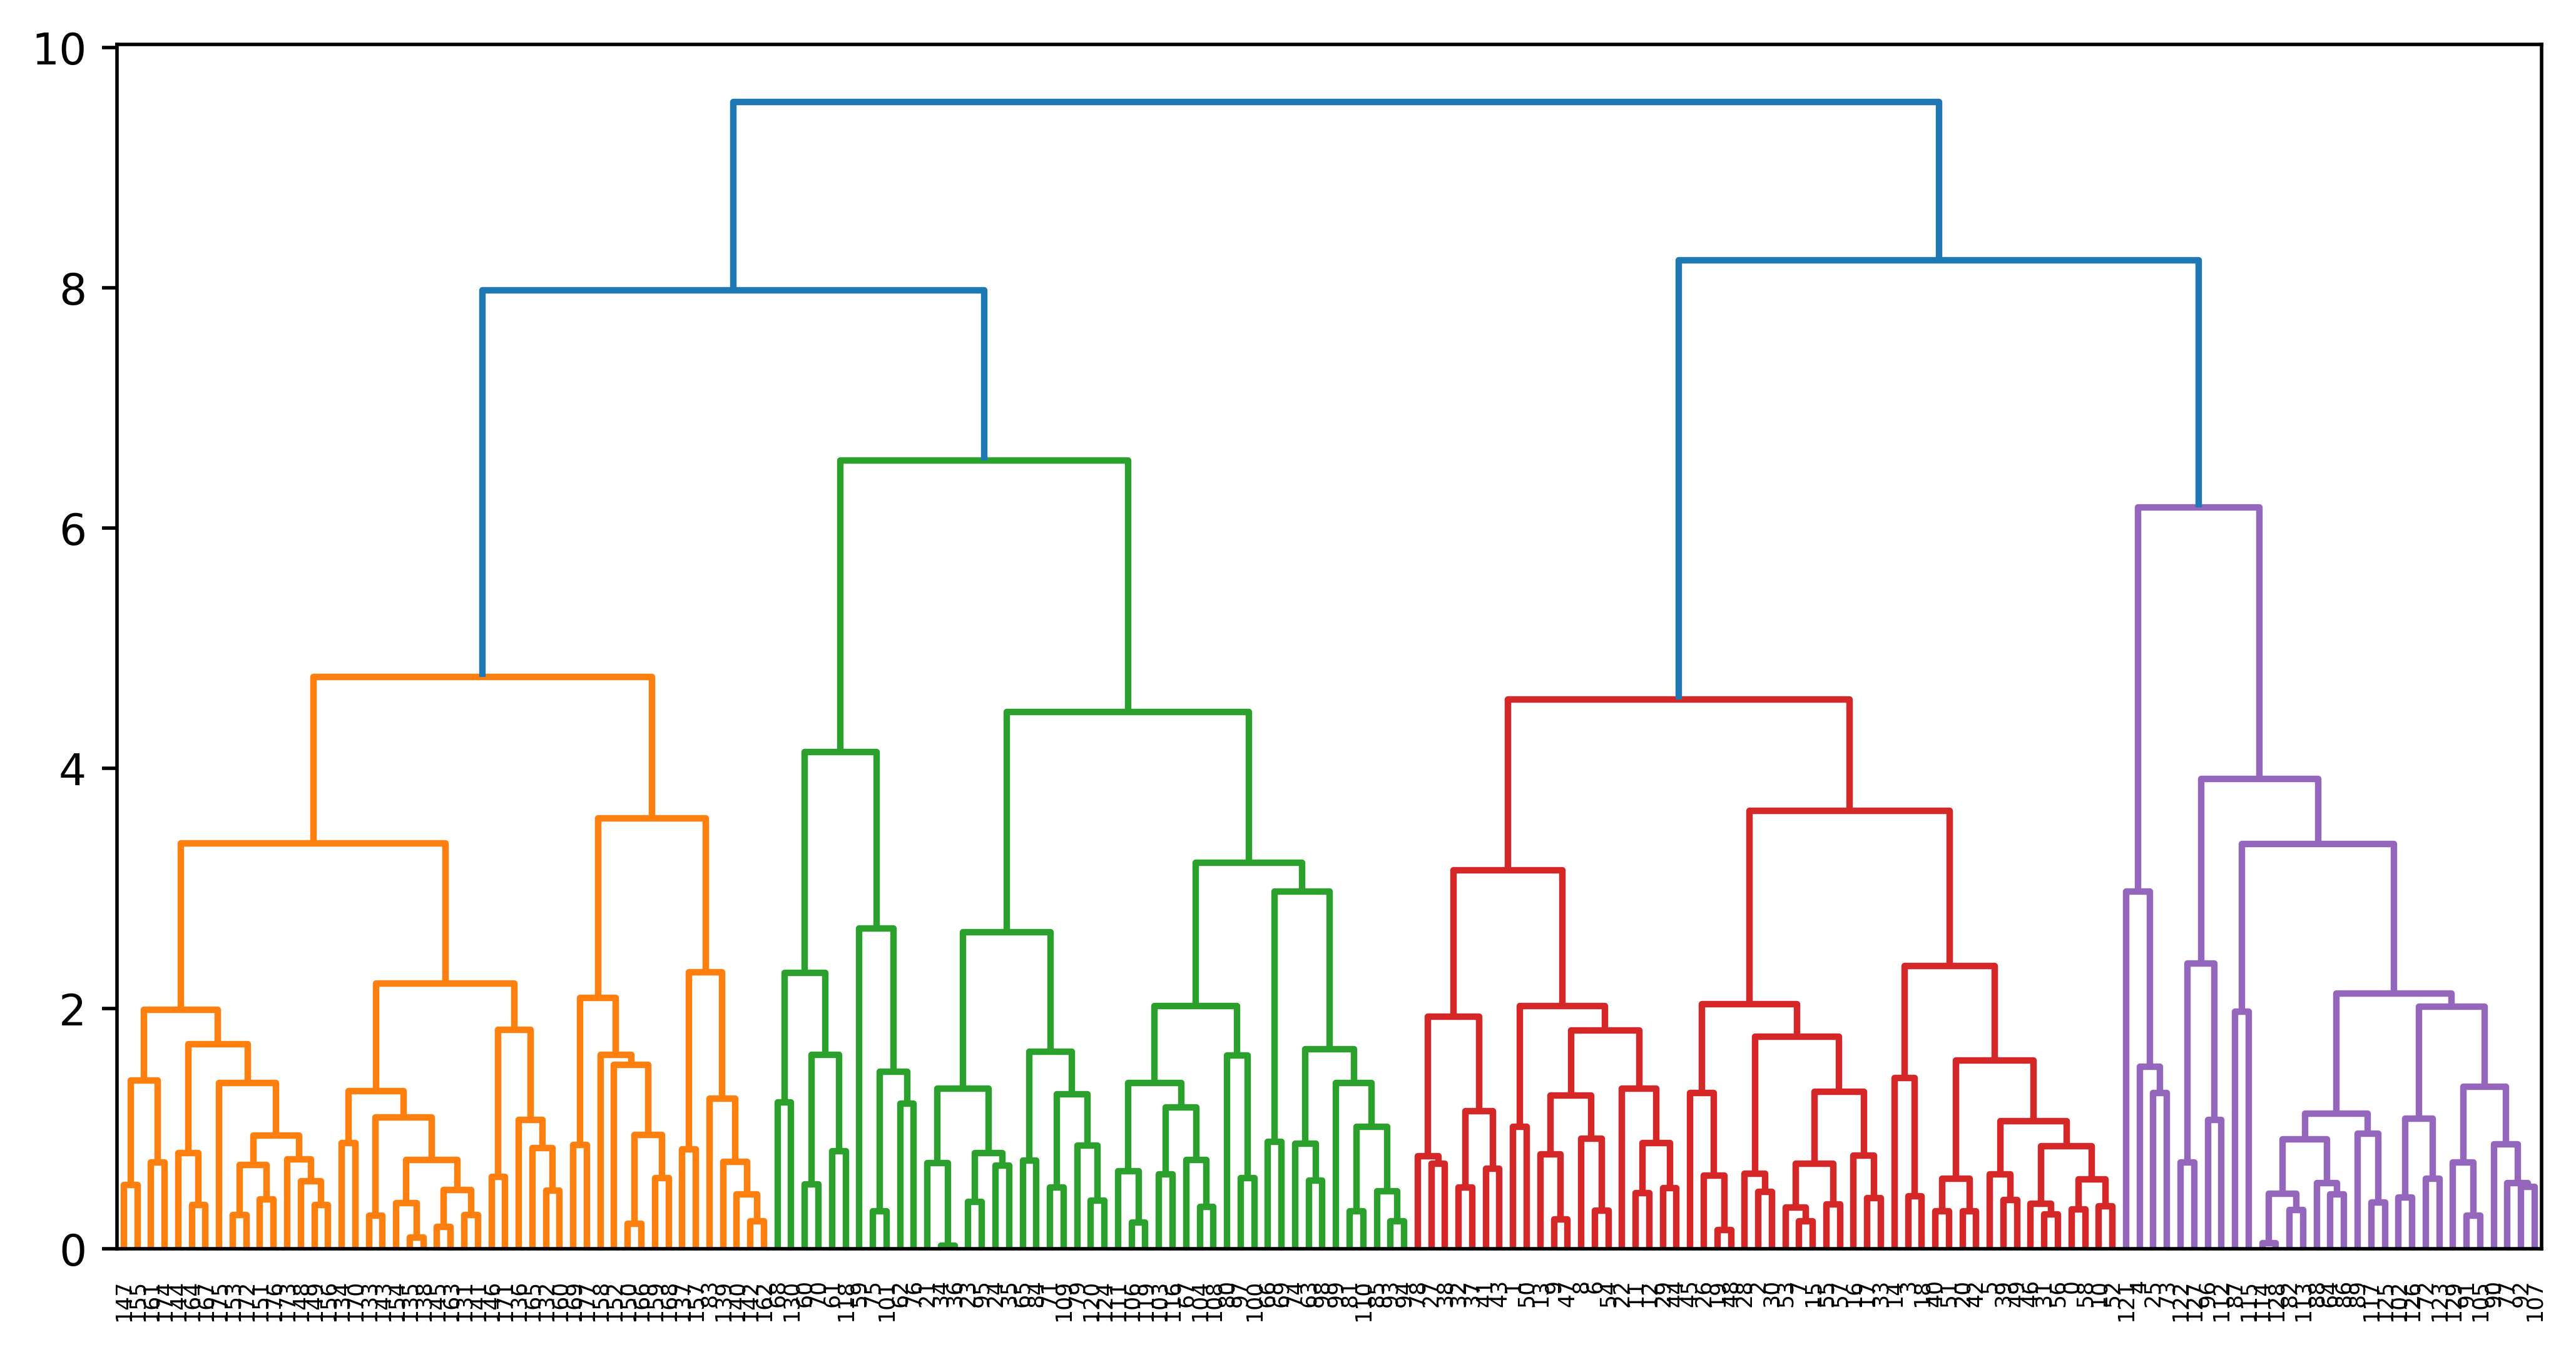

In [32]:
lk = hierarchy.linkage(pcs, method="complete")
dendrogram = hierarchy.dendrogram(lk)

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [34]:
hc = AgglomerativeClustering(n_clusters=4)
ypred = hc.fit_predict(pcs)
ypred

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [35]:
df["Clusters"] = ypred

In [36]:
silhouette_score(pcs, ypred)

0.4634306213048911